# Tarefa 02

- Leia os enunciados com atenção
- Saiba que pode haver mais de uma resposta correta
- Insira novas células de código sempre que achar necessário
- Em caso de dúvidas, procure os monitores
- Divirta-se :)

In [1]:
from pandas_datareader import data as web
from plotly import graph_objects
from plotly.graph_objs import Layout

import yfinance as yf
import plotly.express as px
import datetime
import pandas as pd
import plotly.io as pio

#pio.renderers.default='notebook'
yf.pdr_override()

#### 1. Carregue os dados da tarefa anterior

In [2]:
df = pd.read_csv('ativos.csv', header=[0, 1], index_col=0)

In [3]:
df.head()

Adj Close                            Close                        \
             ITUB3.SA   PETR4.SA   VALE3.SA   ITUB3.SA   PETR4.SA   VALE3.SA   
Date                                                                           
2021-10-15  19.890305  12.390561  69.922684  22.100000  29.600000  80.680000   
2021-10-18  20.124311  12.327772  69.264015  22.360001  29.450001  79.919998   
2021-10-19  19.602301  11.724987  68.466690  21.780001  28.010000  79.000000   
2021-10-20  20.124311  11.930102  66.447350  22.360001  28.500000  76.669998   
2021-10-21  19.854301  11.490572  65.138695  22.059999  27.450001  75.160004   

                 High                              Low                        \
             ITUB3.SA   PETR4.SA   VALE3.SA   ITUB3.SA   PETR4.SA   VALE3.SA   
Date                                                                           
2021-10-15  22.180000  29.840000  80.949997  21.600000  29.510000  79.300003   
2021-10-18  22.459999  29.639999  80.400002  21.730000  28.990000  78.480003   
2021-10-19  22.190001  29.320000  80.239998  21.700001  27.860001  78.809998   
2021-10-20  22.400000  28.799999  78.370003  21.790001  27.950001  76.279999   
2021-10-21  22.450001  28.180000  75.160004  21.629999  26.920000  72.949997   

                 Open                         Volume                       
             ITUB3.SA   PETR4.SA   VALE3.SA ITUB3.SA   PETR4.SA  VALE3.SA  
Date                                                                       
2021-10-15  21.660000  29.799999  79.489998  2044900   72479900  26927200  
2021-10-18  21.959999  29.400000  79.910004  1711400   68971300  20912800  
2021-10-19  22.190001  29.240000  79.720001   822200  111484000  20804500  
2021-10-20  22.000000  28.270000  78.370003  1799800   56063300  27576600  
2021-10-21  21.950001  27.860001  74.500000  1680600  101567700  37556500

#### 2. Média móvel

1. Faça uma média móvel  em 90 dias dos valores de fechamento ajustados dos ativos que você escolheu
2. Utilizando a fução ```rolling()```, calcule o desvio pardão desses ativos ao longo do tempo, utilizando a mesma janela móvel do item acima
2. Monte um gráfico de linhas para as médias móveis dos ativos da sua base
4. Monte um gráfico de linhas para os desvios padrão em janela móvel
5. Compare os dois gráficos que você fez com o da tarefa anterior. Veja se eles apontam conclusões semelhantes quanto aos períodos de maior volatilidade (variação) dos ativos.

In [4]:
# 1. Faça uma média móvel em 90 dias dos valores de fechamento ajustados dos ativos que você escolheu

med = df['Adj Close'].rolling(90).mean().dropna().stack().reset_index()
med.columns = ['data', 'ativo', 'media']
med.head()

,data,ativo,media
0,2022-02-23,ITUB3.SA,19.005602
1,2022-02-23,PETR4.SA,13.442793
2,2022-02-23,VALE3.SA,67.986263
3,2022-02-24,ITUB3.SA,19.003439
4,2022-02-24,PETR4.SA,13.479579


In [5]:
# 2. Utilizando a fução rolling(), calcule o desvio pardão desses ativos ao longo do tempo, 
# utilizando a mesma janela móvel do item acima

desvio = df['Adj Close'].rolling(90).std().dropna().stack().reset_index()
desvio.columns = ['data', 'ativo', 'desvio']
desvio.head()

,data,ativo,desvio
0,2022-02-23,ITUB3.SA,0.953741
1,2022-02-23,PETR4.SA,1.594722
2,2022-02-23,VALE3.SA,6.737450
3,2022-02-24,ITUB3.SA,0.951931
4,2022-02-24,PETR4.SA,1.608304


In [6]:
# função para criar um gráfico de linhas

def grafico_linhas(dtf: pd.DataFrame, coluna: str) -> None:
    fig = px.line(dtf, x='data', y=coluna, color='ativo', template='none')
    #fig.show(renderer='notebook')
    fig.show('png')

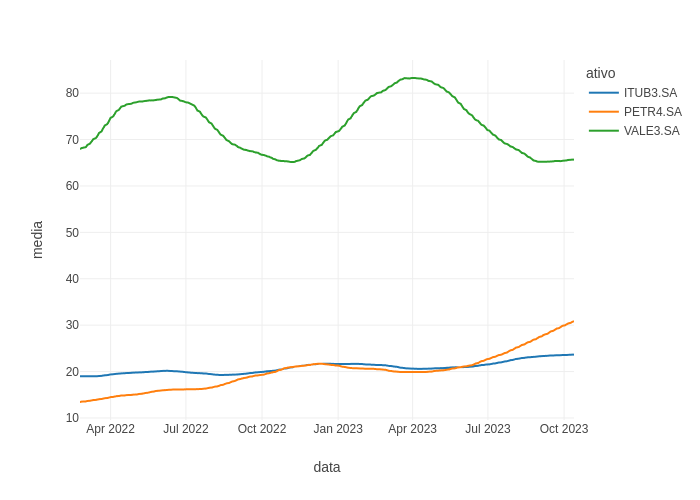

In [7]:
# 3. Monte um gráfico de linhas para as médias móveis dos ativos da sua base

grafico_linhas(med, 'media')

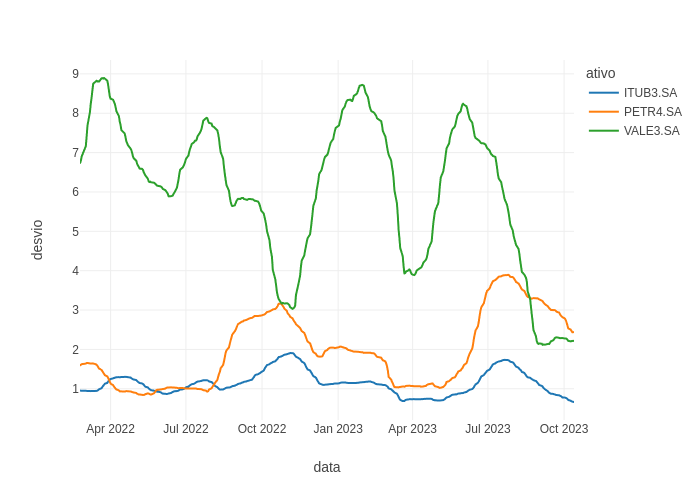

In [8]:
# 4. Monte um gráfico de linhas para os desvios padrão em janela móvel

grafico_linhas(desvio, 'desvio')

In [9]:
# 5. Compare os dois gráficos que você fez com o da tarefa anterior. 
# Veja se eles apontam conclusões semelhantes quanto aos períodos de maior volatilidade (variação) dos ativos.

Os dois gráficos acima apontam uma volatilidade maior para as ações da vale assim como no gráfico do exercício anterior.

#### 3. Gráfico de *candlestick*
1. Selecione o período dos últimos 60 dias (corridos) para um dos ativos da sua base
2. Monte um gráfico de *candlestick* para esses dados.

In [10]:
# empilhando os dados e resetando o índice
dados = df.stack().reset_index()

# filtrando os dados da VALE
dados = dados[dados['level_1'] == 'VALE3.SA']

# voltando com a data para o index
dados = dados.set_index('Date').drop(columns='level_1')

# filtrando os últimos 60 dias
dados = dados.loc['2023-07-14':, :]

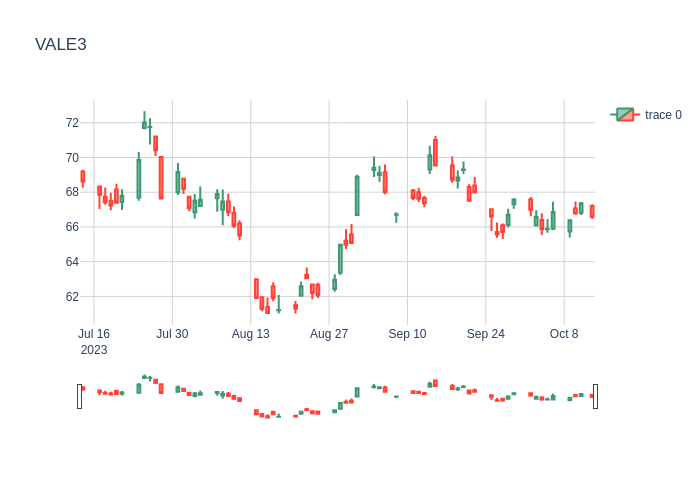

In [11]:
layout = Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)'
)

grafico = graph_objects.Figure(
    data = [{
        'x': dados.index,
        'open': dados.Open,
        'close': dados.Close,
        'high': dados.High,
        'low': dados.Low,
        'type': 'candlestick',
        'showlegend': True
    }],
    layout_title="VALE3",
    layout=layout
)

grafico.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
grafico.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
#grafico.show(renderer='notebook')
grafico.show('png')